Multiple Linear Regression'da birden fazla bağımsız değişkene karşılık bir bağımlı değişken bulunur

Linear Regression veriler arasında var olan korelasyonu(ilişkiyi) kullanarak yeni gelecek verileri tahmin etme modelidir. burada makine öğrenimi bize veriler arasındaki bu ilişkiyi belirlememize yardımcı olur ve bu sayede yeni verileri tahmin edebiliriz

* y= a+b1x1+b2x2+b3x+... denklemindeki a ve b(i) sayılarının hesaplanmasıdır
* pythona örnek veri setimizi verdiğimizde python bizim için a ve b(i) değerlerini hesaplar ve yeni x değerlerimizi için y'yi bize hesaplayıp sonuç olacak verecek fonksiyonu üretir

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

dataset={
    "alan":[180,225,260,320,335,345,355,400],
    "odasayisi":[5,4,3,6,4,5,3,4],
    "binayasi":[10,18,2,10,9,14,0,10],
    "fiyat":[515000,508000,548000,650000,628000,632000,680000,725000]
}
df=pd.DataFrame(dataset)
df

,alan,odasayisi,binayasi,fiyat
0,180,5,10,515000
1,225,4,18,508000
2,260,3,2,548000
3,320,6,10,650000
4,335,4,9,628000
5,345,5,14,632000
6,355,3,0,680000
7,400,4,10,725000


#### aşağıdaki 3 adet konut için yapay zeka kullanarak tahmini satış fiyatını bulacağız.
#### -1.konut: alan 230 m2 4oda bina yaşı:10
#### -2.konut: alan 230 m2 6oda bina yaşı:0
#### -3.konut: alan 355 m2 3oda bina yaşı:20

In [18]:
reg=linear_model.LinearRegression() #nesnemizi oluşturduk
reg.fit(df[["alan","odasayisi","binayasi"]],df["fiyat"]) #önce bağımsız değerleri verip sonra bağımlı değeri veriyoruz
#fit ile öğretip y= a+b1x1+b2x2+b3x+... denklemi üzerindn hesaplatıyoruz
#tahmin yapalım
reg.predict([[230,4,10]])

C:\Users\90541\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([531825.15244295])

In [19]:
reg.predict([[230,6,0]])

C:\Users\90541\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590005.75210978])

In [23]:
reg.predict([[355,3,20]])

C:\Users\90541\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([614506.40327617])

In [25]:
reg.predict([[230,4,10],[230,6,0],[355,3,20]]) # tek satırda da hesaplayabiliriz

C:\Users\90541\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([531825.15244295, 590005.75210978, 614506.40327617])

In [29]:
# y= a+b1x1+b2x2+b3x+... formülümüze göre
a=reg.intercept_
b1=reg.coef_[0]
b2=reg.coef_[1]
b3=reg.coef_[2]

x1=230
x2=4
x3=10

y=a+b1*x1+b2*x2+b3*x3
y

531825.1524429523

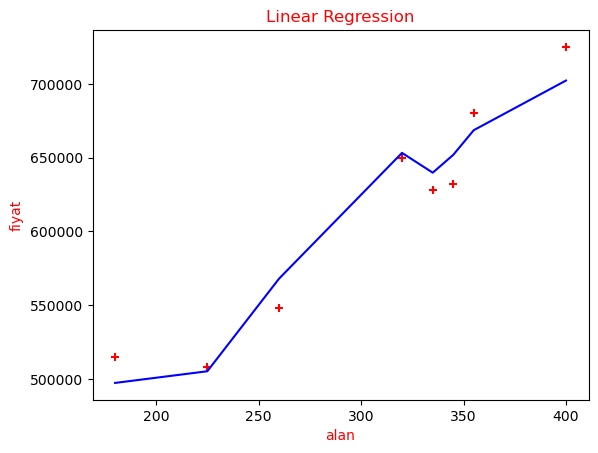

In [30]:
plt.xlabel("alan",color="red")
plt.ylabel("fiyat",color="red")
plt.title("Linear Regression",color="red")
plt.scatter(df.alan,df.fiyat,color="red",marker="+")
plt.plot(df.alan,reg.predict(df[["alan","odasayisi","binayasi"]]),color="blue") #çizgi